# Cross-validation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
quality_mapping = {i+3:i for i in range(6)}

In [5]:
quality_mapping

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [6]:
df.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.loc[:, 'quality'] = df.quality.map(quality_mapping)

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


## Splitting

In [10]:
df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [11]:
print('df: ', df.shape)
print('df_train: ', df_train.shape)
print('df_test: ', df_test.shape)

df:  (1599, 12)
df_train:  (1000, 12)
df_test:  (599, 12)


## Decision Tree

In [12]:
from sklearn import tree
from sklearn import metrics

In [13]:
clf = tree.DecisionTreeClassifier(max_depth=5)

In [14]:
cols = list(df.columns); cols.remove('quality'); cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [15]:
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=5)

## Test accuracy on test data

In [16]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

In [17]:
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [18]:
print('train: ', train_accuracy)
print('test: ', test_accuracy)

train:  0.698
test:  0.5609348914858097


In [19]:
from sklearn import tree
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

%matplotlib inline

In [21]:
train_accuracies = [0.5]
test_accuracies  = [0.5]

In [22]:
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [23]:
for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    clf.fit(df_train[cols], df_train.quality)
    
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    
    # append accuracies
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    

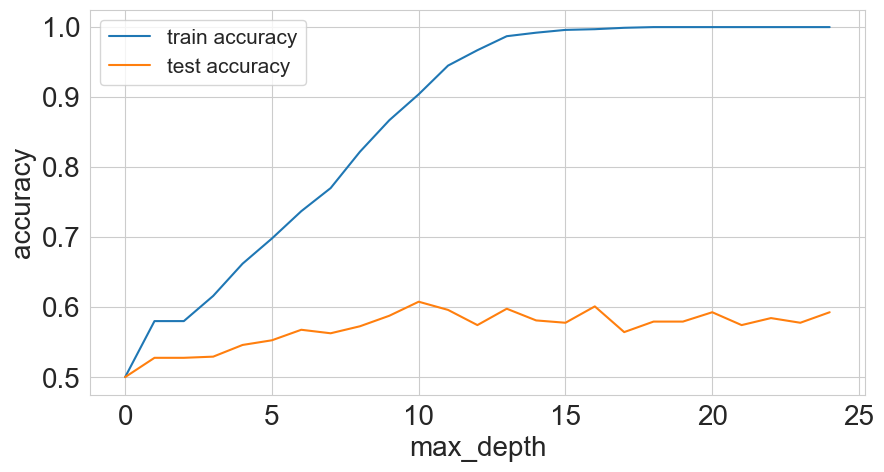

In [25]:
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')

plt.plot(train_accuracies, label='train accuracy')
plt.plot(test_accuracies, label='test accuracy')

plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel('max_depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

### KFOLD

In [26]:
import pandas as pd
from sklearn import model_selection

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.330,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,5
1,11.6,0.420,0.53,3.3,0.105,33.0,98.0,1.00100,3.20,0.95,9.2,2
2,7.7,0.775,0.42,1.9,0.092,8.0,86.0,0.99590,3.23,0.59,9.5,2
3,9.7,0.690,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.1,2
4,8.2,0.230,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,3


In [28]:
df.shape

(1599, 12)

In [29]:
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)

In [30]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,10.0,0.56,0.24,2.2,0.079,19.0,58.0,0.99910,3.18,0.56,10.1,3,-1
1,11.3,0.37,0.41,2.3,0.088,6.0,16.0,0.99880,3.09,0.80,9.3,2,-1
2,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.9,4,-1
3,7.4,0.37,0.43,2.6,0.082,18.0,82.0,0.99708,3.33,0.68,9.7,3,-1
4,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,2,-1


In [31]:
kf = model_selection.KFold(n_splits=5)

In [32]:
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [33]:
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold

In [34]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,10.0,0.56,0.24,2.2,0.079,19.0,58.0,0.99910,3.18,0.56,10.1,3,0
1,11.3,0.37,0.41,2.3,0.088,6.0,16.0,0.99880,3.09,0.80,9.3,2,0
2,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.9,4,0
3,7.4,0.37,0.43,2.6,0.082,18.0,82.0,0.99708,3.33,0.68,9.7,3,0
4,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,2,0


## stratified KFOLD

In [35]:
import pandas as pd
from sklearn import model_selection

In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,10.0,0.56,0.24,2.2,0.079,19.0,58.0,0.99910,3.18,0.56,10.1,3,0
1,11.3,0.37,0.41,2.3,0.088,6.0,16.0,0.99880,3.09,0.80,9.3,2,0
2,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.9,4,0
3,7.4,0.37,0.43,2.6,0.082,18.0,82.0,0.99708,3.33,0.68,9.7,3,0
4,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,2,0


In [37]:
df.quality.value_counts(normalize=True).sort_values()

0    0.006254
5    0.011257
1    0.033146
4    0.124453
3    0.398999
2    0.425891
Name: quality, dtype: float64

In [38]:
df['kfold'] = -1

In [39]:
df = df.sample(frac=1).reset_index(drop=True)
y = df.quality.values

In [40]:
kf = model_selection.StratifiedKFold(n_splits=5)

In [41]:
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f

In [42]:
df.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
932,12.0,0.500,0.59,1.4,0.073,23.0,42.0,0.99800,2.92,0.68,10.5,4,3
951,7.2,0.415,0.36,2.0,0.081,13.0,45.0,0.99720,3.48,0.64,9.2,2,2
892,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2,2
1315,5.0,0.740,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,3,4
1195,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,3,3


In [43]:
# let's have a look at the distribution

Text(0, 0.5, 'count')

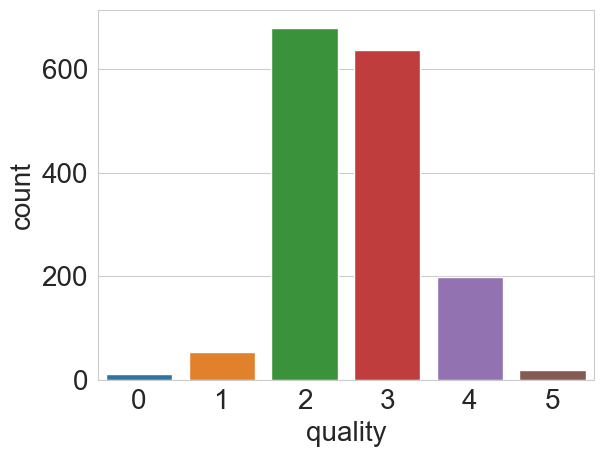

In [44]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel('quality', fontsize=20)
b.set_ylabel('count', fontsize=20)

In [45]:

## 


## Application stratified k-fold to a sample regression datase 

In [46]:
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn import datasets

In [47]:
kf = model_selection.StratifiedKFold(n_splits=5)

def create_folds(data):
    data['kfold'] = -1
    data = data.sample(frac=1).reset_index(drop=True)
    num_bins = int(np.floor(1 + np.log2(len(data))))
    
    data.loc[:, 'bins'] = pd.cut(
        data['target'], bins=num_bins, labels=False
    )
    
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
        
    data = data.drop('bins', axis=1)
    
    return data

In [48]:
X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1
)

In [49]:
df = pd.DataFrame(
    X,
    columns=[f'f_{i}' for i in range(X.shape[1])]
)

In [50]:
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99
0,0.908702,0.863213,0.659884,-0.711924,-1.610119,-0.665041,-0.782761,-0.354145,0.638781,1.447802,...,1.069523,-0.608331,-0.315072,0.125106,-0.426183,-0.097933,-0.925763,1.135288,0.719014,-2.220330
1,0.103808,-0.559136,2.339417,-0.555261,0.018908,-1.627356,-1.089725,1.358659,-1.197085,1.909629,...,-0.951916,-2.066739,1.046293,-0.423755,-0.107547,-0.541521,-0.398696,0.825377,-0.035627,1.029821
2,1.136136,-1.777218,0.073085,-0.424804,-0.485977,-0.154200,-0.335167,-0.405034,0.239495,1.091246,...,0.416749,-0.039163,0.814508,-0.087302,-0.121359,-0.790930,0.719851,-0.789046,0.542075,-1.146379
3,-1.562063,-0.516165,0.093400,-0.298991,0.109677,-0.348807,-0.332685,-1.656410,1.543833,0.271812,...,-0.027667,-0.019721,1.480388,1.704931,-0.771733,0.912019,1.623693,-0.194973,-0.588878,-0.397634
4,0.082933,1.422644,1.521478,-0.563762,-0.173356,-1.078420,0.421966,-0.215220,-0.105333,-1.346101,...,-1.108938,1.312594,-0.613419,0.473561,0.583320,0.329931,0.123139,-0.412265,-0.409448,0.657190


In [51]:
df.loc[:, 'target'] = y
df = create_folds(df)

In [52]:
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,-2.091223,1.567220,-1.171267,-1.380256,-1.014936,-0.588974,-1.484506,1.343880,-0.521444,-0.431378,...,0.074504,-0.462074,0.059418,0.137727,0.587928,-0.012796,0.071225,0.662511,-156.316448,0
1,-0.304242,0.126348,-1.329543,-1.963519,-0.482368,-0.937266,1.093054,1.231556,1.512080,1.247086,...,0.232943,1.657727,-0.573716,0.564741,1.297176,1.042035,-1.393393,1.304960,196.765704,0
2,1.127551,-1.044156,0.250179,0.118400,-0.431439,0.073910,-0.092372,-0.747969,1.535695,0.944534,...,-0.557851,-0.668203,0.510465,-0.765138,1.762308,0.685690,-0.501836,-0.907249,-51.332588,0
3,0.234175,1.241210,2.963119,0.155213,-0.661127,0.202851,2.851326,-0.242033,-0.789030,-0.022896,...,0.183354,0.109021,-1.145953,-1.327867,-1.364768,-0.480703,1.707927,-2.161627,-411.668051,0
4,-1.537242,-0.727159,2.235540,2.397853,-0.328859,2.061807,-0.626483,-0.530535,-0.965323,-1.507152,...,-0.631796,1.545825,-0.397316,-0.287828,1.522027,1.062241,-1.279253,-2.038587,125.150927,0
